# <font color=black>Kaggle-酒店预订需求 数据分析</font>
高东海，侯星铭，王伟

## 1.背景介绍
数据集来自Kaggle网站上公开的Hotel booking demand项目

该数据集包含了一家城市酒店和一家度假酒店的预订信息，包括预订时间、入住时间、成人、儿童或婴儿数量、可用停车位数量等信息。

数据集容量约为12万×32

本次数据分析主要包含如下内容：

* 总览数据，完成对数据的**数据预处理**
* 利用数据集对酒店运营状况/市场情况/客户画像进行**数据分析**
* 根据数据集建立**预测模型**，预测客户是否会取消预订


## 2.数据概览以及数据预处理

### 2.1 数据概览

首先导入需要的库，并且设置了后面的代码块不需要再重复导入库


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import eli5 # Feature importance evaluation
# 机器学习
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

D:\conda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\conda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


导入数据，并查看数据的基本信息

In [2]:
data_origin = pd.read_csv('C:/Users/一叶孤城/Desktop/常用/大数据的统计原理/高东海-侯星铭-王伟（数据分析）/hotel_bookings.csv') 
#这里的代码路径根据用户保存路径有所不同
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

总结一下数据列的基本情况

<img src="feature.png" />


数据主要包含了以下三个方面的信息：
* 订单信息：预订相关时间/状态信息
* 房间信息：酒店房间的价格/类型特征
* 客户信息：客户自身的相关信息

### 2.2 数据预处理
#### 2.2.1 缺失值处理
先统计出出现缺失值的各列所包含缺失值的数目

In [3]:
data = data_origin.copy()
missing=data.isnull().sum(axis=0)
missing[missing!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

可以看到一共有4列出现了缺失值，我们做如下处理：
* children列和country列缺失值的数量占总体比例非常小，我们直接用对应列的**众数**进行**填充**(因为这两列是类别型变量，所以不用平均数去填充）
* agent列缺失值数量相对较多，将缺失值单独作为新类别，标记为0
* company列**几乎全为缺失值**，包含了极少量的有效值，因此删除此列

In [4]:
#缺失值处理
data.children.fillna(data.children.mode()[0],inplace=True)
data.country.fillna(data.country.mode()[0],inplace=True)
data.agent.fillna(0, inplace=True)
data.drop('company', axis=1,inplace=True)
#(执行一遍就可以了)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### 2.2.2 异常值处理






* 通过在Kaggle网站上的数据集说明（下载数据的侧面）仔细观察数据可以发现，存在入住**总**人数为0和入住**总**天数为0的数据，即异常数据，我们需要对这些数据做筛选和清理
* 数据集说明里，我们还可以发现meal列的Undefined/SC均表示未预定餐食，我们需要把其并为同一类

In [6]:
zero_guest=data[data[['adults', 'children', 'babies']].sum(axis=1) == 0]  
data.drop(zero_guest.index, inplace=True)#筛选入住总人数为0的数据

zero_days = data[data[['stays_in_weekend_nights','stays_in_week_nights']].sum(axis=1) == 0]
data.drop(zero_days.index, inplace=True)#筛选入住总天数为0的数据

data.meal.replace("Undefined", "SC", inplace=True)# 餐食类型Undefined/SC合并

再查看一下经过处理的数据基本信息


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_week_nights            118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  float64
 11  babies                          118565 non-null  int64  
 12  meal            

到这里，数据的**预处理**工作完成，数据集大小清洗为118565*31

## 3.数据可视化分析
### 3.1 客房信息分析


①酒店类型

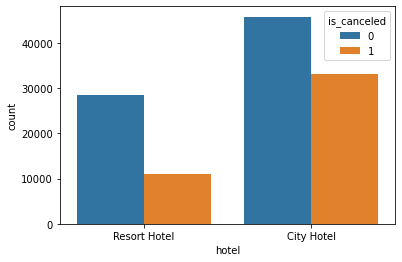

In [8]:
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.show()

②客房类型

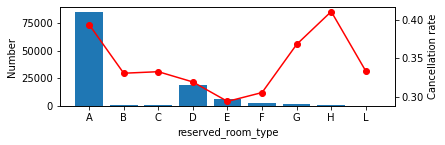

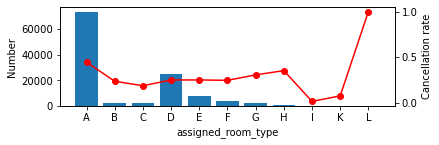

In [9]:
# 查看房间类型与取消预订的关系
index = 1
for room_type in ['reserved_room_type', 'assigned_room_type']:
    # plt.figure(figsize=(6,8))
    ax1 = plt.subplot(2, 1, index)
    index += 1
    ax2 = ax1.twinx()
    ax1.bar(
        data.groupby(room_type).size().index,
        data.groupby(room_type).size())
    ax1.set_xlabel(room_type)
    ax1.set_ylabel('Number')
    ax2.plot(
        data.groupby(room_type)['is_canceled'].mean(), 'ro-')
    ax2.set_ylabel('Cancellation rate')
    plt.show()

订单预定和分配的房间类型多数集中在A/D/E/F四类，其中A类房型取消率高出其余三类约7-8个百分点，值得关注。

下面进一步探索房间类型的变更（即分配房型≠预定房型）对于取消率的影响。

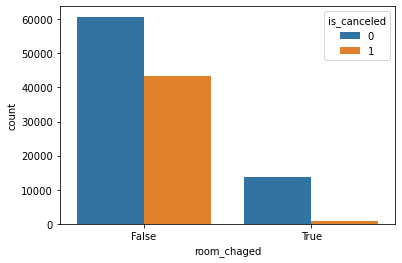

In [10]:
# 房间类型变更对取消预定的影响
data['room_chaged']=data['reserved_room_type']!=data['assigned_room_type']
sns.countplot(x='room_chaged',hue='is_canceled',data=data)

房型变更过的客户取消预定的概率远远小于未变更过的客户，可能有以下原因：

①客户到达酒店后临时更改房型，多数客户会选择不取消预定，直接入住，

②客户自行更改房型，相对取消预定而言，这类客户更愿意更改房间类型而保证正常入住。

### 3.2 客户信息分析

①入住人数

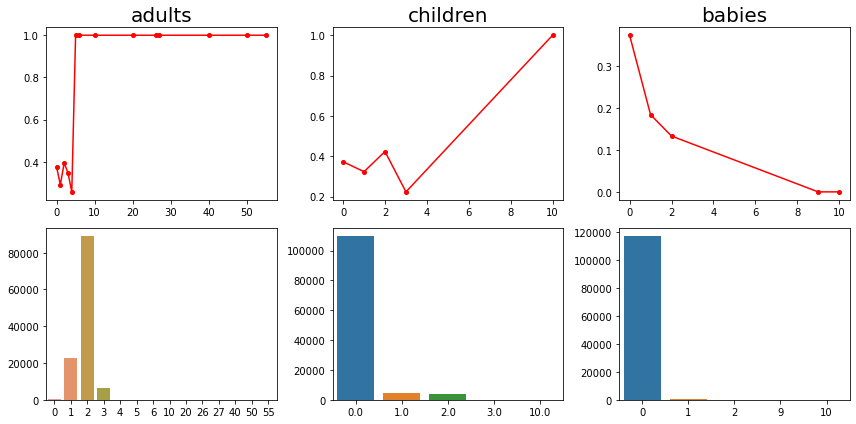

In [11]:
# 查看预定人数与取消预定的关系
plt.figure(figsize=(12, 6))
index = 0
for people in ['adults', 'children', 'babies']:
    index += 1
    plt.subplot(2, 3, index)
    plt.plot(data.groupby(people)['is_canceled'].mean(),
             'ro-',
             ms=4)
    plt.title(people, fontsize=20)
    plt.subplot(2, 3, index + 3)
    people_stats = data[people].value_counts()
    sns.barplot(people_stats.index, people_stats.values)
plt.tight_layout()
plt.show()

1）多数预定订单没有儿童和婴儿入住，其中单人入住和双人入住是主要的预定人数模式；

2）有婴儿入住时预定取消率大幅下降；

3）超过5人以上入住的订单基本全部取消，这部分可能是刷单等异常订单，酒店需要注意。

针对不同酒店，重点分析下列几种入住人数情况的取消率：

单人入住：adults=1, children, babies=0

双人入住：adults=2, children, babies=0

家庭入住：adults>2, children, babies>0

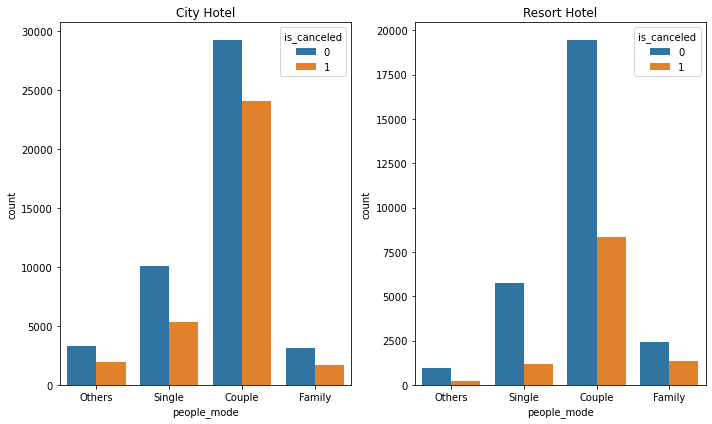

In [12]:
# 入住人数模式分析
# 单人
single = (data.adults == 1) & (data.children == 0) & (data.babies == 0)
# 双人
couple = (data.adults == 2) & (data.children == 0) & (data.babies == 0)
# 家庭
family = (data.adults >= 2) & (data.children > 0) | (data.babies > 0)

data['people_mode'] = single.astype(int) + couple.astype(int) * 2 + family.astype(int) * 3
plt.figure(figsize=(10,6))
index=1
for hotel_kind in ['City Hotel','Resort Hotel']:
    plt.subplot(1,2,index)
    index+=1
    sns.countplot(x='people_mode',
              hue='is_canceled',
              data=data[data.hotel == hotel_kind])
    plt.xticks([0, 1, 2, 3], ['Others', 'Single', 'Couple', 'Family'])
    plt.title(hotel_kind)
plt.tight_layout()
plt.show()

对于城市酒店，取消预定概率：双人>>单人≈家庭，应注意双人入住客户的高取消率现象，改善酒店对于双人入住客户的配套服务以降低取消率。

对于度假酒店，取消预订概率：家庭>双人>单人，酒店可适当针对家庭客户提供相应的优惠折扣，提高家庭客户入住率。

②餐食类型

Text(0.5, 1.0, 'Uncanceled')

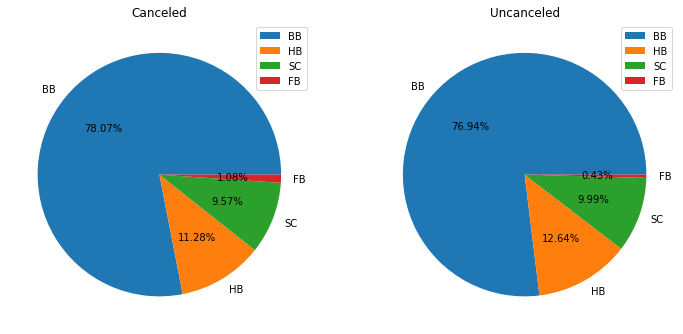

In [13]:
# 查看餐食类型与取消预订的关系
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(data[data['is_canceled'] == 1].meal.value_counts(),
        labels=data[data['is_canceled'] == 1].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Canceled')
plt.subplot(122)
plt.pie(data[data['is_canceled'] == 0].meal.value_counts(),
        labels=data[data['is_canceled'] == 0].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Uncanceled')

可以看到无论是否取消预订，餐食类型之间差异不大。

③车位需求

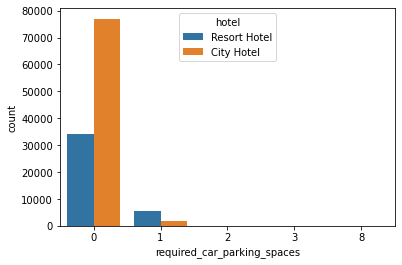

In [14]:
# 车位需求统计
sns.countplot(x='required_car_parking_spaces',hue='hotel',data=data)

多数客户不需要停车位，相比之下，度假酒店客户需要停车位的比例远大于城市酒店。

④国家/地区

数据集客户来自177个国家/地区，为方便分析，只选择预定数前20的国家/地区进行分析

Text(0, 0.5, 'Cancellation rate')

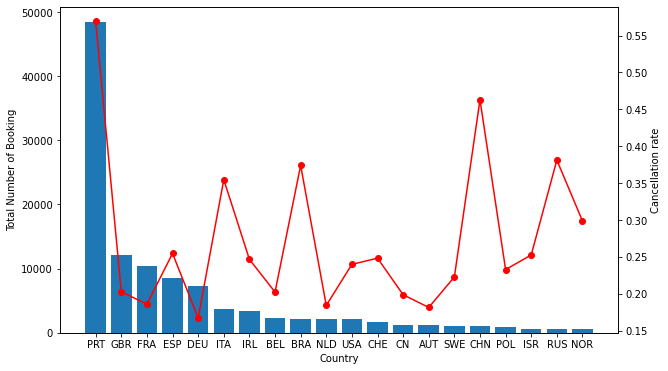

In [15]:
# 查看不同国家订单取消率
# 选取预定数前20的国家/地区
countries_20 = list(
    data.groupby('country').size().sort_values(ascending=False).head(20).index)
data[data.country.isin(countries_20)].shape[0] / data.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(20), countries_20)
ax1.bar(
    range(20), data[data.country.isin(countries_20)].groupby('country').size().sort_values(ascending=False))
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(20),
    data[data.country.isin(countries_20)].groupby('country')['is_canceled'].mean().loc[countries_20], 'ro-')
ax2.set_ylabel('Cancellation rate')

统计可知，前20名国家/地区数据量占据全部数据的94%，客户主要来自葡萄牙，英国，法国，西班牙等欧洲国家，不同国家之间预定取消率的差距非常显著，取消率较高的国家有葡萄牙、意大利、巴西、中国、俄罗斯，以发展中国家为主。

⑤客户预定历史

客户预定历史指客户之前预定过的订单的取消情况，可以一定程度上反映客户当前订单的取消意愿。

Text(0.5, 0, 'Previous Un-Cancellations')

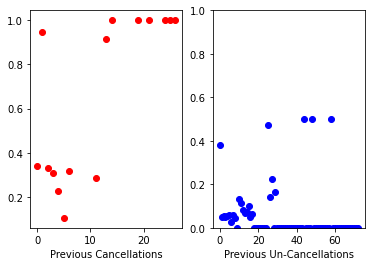

In [16]:
# 查看客户预定历史与取消订单的关系
# 是否回头客
tick_label = ['New Guest', 'Repeated Guest']
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=data)
plt.xticks([0, 1], tick_label)

# 之前取消预定次数
plt.subplot(121)
plt.plot(data.groupby('previous_cancellations')['is_canceled'].mean(),
         'ro')
plt.xlabel('Previous Cancellations')
# 之前未取消预定次数
plt.subplot(122)
plt.plot(data.groupby('previous_bookings_not_canceled')['is_canceled'].mean(),
         'bo')
plt.ylim(0, 1)
plt.xlabel('Previous Un-Cancellations')

1）大多数预定来自于新客，而熟客取消预定的概率远远小于新客；

2）先前取消过预定的客户本次预定取消的概率较大，尤其是取消过预定15次以上的客户，基本上不会选择入住，可以计入酒店的“黑名单”；

3）先前预定并入住过的客户相对来说信用较好，高入住次数（>20次）客户基本不会取消预订。


### 3.3 订单信息分析

①提前预定时长

Text(0, 0.5, 'Cancellation rate')

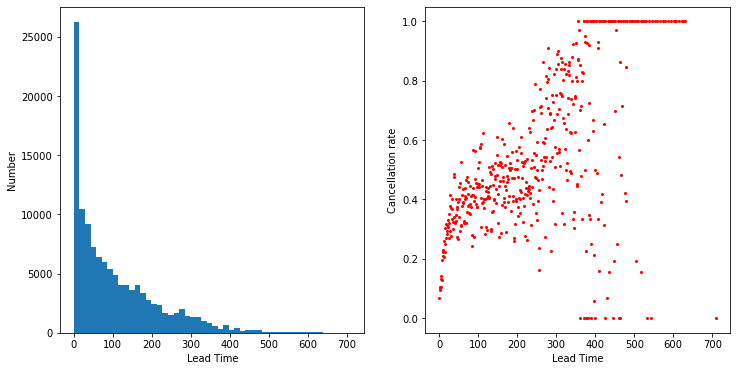

In [17]:
# 提前预定时长的分布情况
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(data['lead_time'], bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')
# 提前预定时长对取消的影响
plt.subplot(122)
plt.plot(data.groupby('lead_time')['is_canceled'].mean().index,
         data.groupby('lead_time')['is_canceled'].mean(),
         'ro',
         markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation rate')

从预定提前时长分布明显可以看出，客户倾向于选择与入住时间相近的时间预定，并且随着预定提前时长的增大，取消率呈现上升趋势。

②入住时间

数据集时间跨度为2015年7月-2017年8月，研究不同月份的预定取消情况。

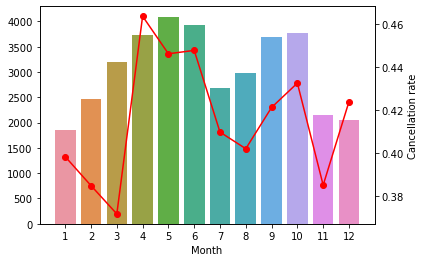

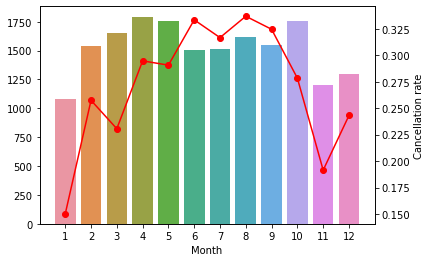

In [18]:
# 不同月份预定和取消情况
ordered_months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]

for hotel in ['City Hotel','Resort Hotel']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    data_hotel=data[data.hotel==hotel]
    monthly = data_hotel.groupby('arrival_date_month').size()
    monthly /= 2
    monthly.loc[['July', 'August']] = monthly.loc[['July', 'August']] * 2 / 3
    sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1)
    ax2.plot(
    range(12), data_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[ordered_months].values, 'ro-')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Cancellation rate')

1）预定量上，城市酒店7/8月出现大幅下滑，同期度假酒店变化较小，整体而言，度假酒店月度客流量变化较小；

2）取消率上，两家酒店冬季取消率相对较低，城市酒店夏季取消率降低，度假酒店却处于高峰。

下面结合酒店人均价格波动进行分析

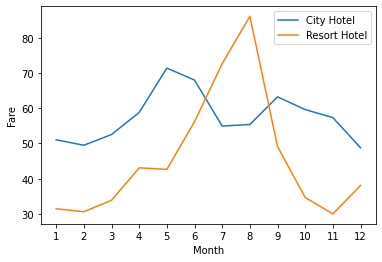

In [19]:
# 不同酒店人均价格波动
# 人均价格(不考虑babies)
data['adr_per_person'] = data['adr'] / (data['adults'] + data['children'])
plt.plot(data[data.hotel == 'City Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='City Hotel')
plt.plot(data[data.hotel == 'Resort Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Fare')
plt.xticks(np.arange(12), range(1, 13))
plt.legend()

两种酒店客房价格趋势主要差异在于7-8月，此时期城市酒店价格小幅下跌，度假酒店价格却急速上涨，一度超过城市酒店。结合预定量和取消量分析，7-8月度假酒店客流减少，取消率大幅上升，经营者应考虑调整价格策略以增加营收。对于用户而言，应考虑避免8月预定度假酒店，此时酒店价格处于高位，而9月价格便会下跌近一半，气候/环境差异不大，是入住的好时期。

③入住时长

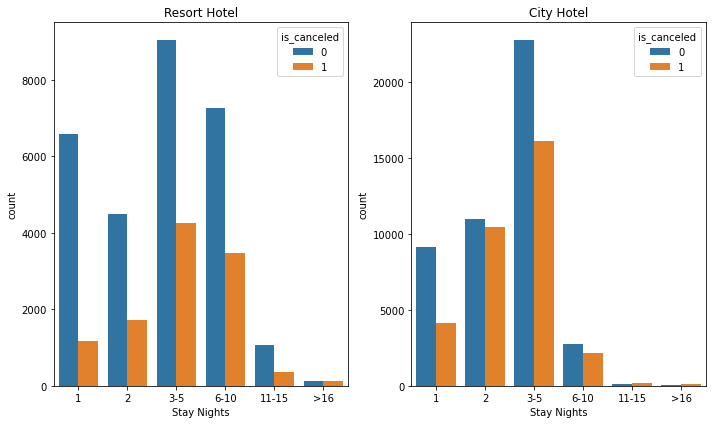

In [20]:
# 预定入住时长对取消预定的影响
data['stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
# 分布过散，进行数据分桶
bin = [0, 1, 2, 5, 10, 15, np.inf]
data['stay_nights_bin'] = pd.cut(data['stay_nights'], bin,
                                 labels=['1', '2', '3-5', '6-10', '11-15', '>16'])
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'Resort Hotel'])
plt.xlabel('Stay Nights')
plt.title('Resort Hotel')
plt.subplot(122)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'City Hotel'])
plt.xlabel('Stay Nights')
plt.title('City Hotel')
plt.tight_layout()
plt.show()


1）度假酒店客户入住时长集中在1-10晚，其中入住1晚的客户取消概率最低；

2）城市酒店客户入住时长多在5晚以内，其中入住2晚的客户取消概率最高；

3）整体而言，度假酒店客户平均入住天数明显高于城市酒店，可以考虑推出长租优惠方案吸引顾客。

④预定渠道

Text(0, 0.5, 'Rate')

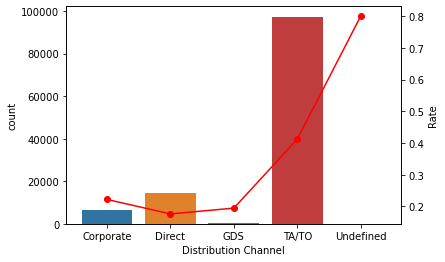

In [21]:
# 预定渠道对取消率的影响
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.countplot(
    x=data['distribution_channel'],
    order=data.groupby('distribution_channel')['is_canceled'].mean().index,
    ax=ax1)
ax1.set_xlabel('Distribution Channel')
ax2.plot(data.groupby('distribution_channel')['is_canceled'].mean(), 'ro-')
ax2.set_ylabel('Rate')

1）预定主要来自于旅行社(TA/TO)，个人直接预定(Direct)和团体预定(Group)；

2）旅行社取消预定的概率远大于其他渠道，可能是由于旅行社出于盈利考虑会取消利润较低的订单。


## 4. 构建预测模型

首先进行特征的筛选，模型目标是对订单是否取消进行预测，挑选特征变量应满足：
* 特征必须为客户预定时就能获得的数据，因此排除booking_changes（预定更改），reservation_status（结账状态），assigned_room_type （最终分配房型）等特征。

* 考虑一定的信息脱敏和通用性，排除country（国籍），arrival_date_year（入住年份）等特征。

完成数据列处理后，先查看一下各数据参数与取消预订之间的相关性

D:\conda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


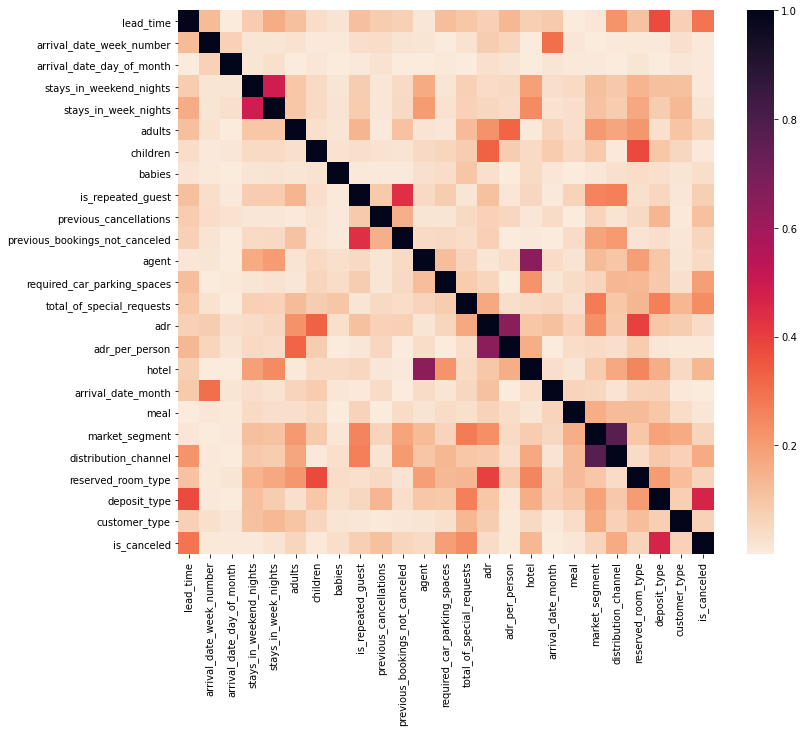

In [22]:
num = [
    'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'agent', 'required_car_parking_spaces',
    'total_of_special_requests', 'adr', 'adr_per_person'
]

cat = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'deposit_type',
    'customer_type'
]

target = ['is_canceled']


ref = num+cat+target
train = data[ref]
#处理类别变量
train[cat]=train[cat].apply(LabelEncoder().fit_transform)
# 查看各列与取消预订的相关系数
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().abs(), cmap=sns.cm.rocket_r)

与取消预订相关性较高的特征有：提前预定时长，车位需求数，特殊需求数，押金类型，酒店类型等。

接下来，进行模型训练，引入多个分类模型，均采用默认参数，简单比较模型之间的准确率。

In [23]:
# 分离特征变量和目标变量
X = train.drop(['is_canceled'], axis=1)
y = train['is_canceled']
#划分测试集和训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

# 特征缩放
std_sca = StandardScaler()
X = std_sca.fit_transform(X)

#岭回归方法
r1=RidgeClassifier(random_state=42)  
r1.fit(X_train,y_train)
print(r1.score(X_train,y_train))
print(r1.score(X_test,y_test))


0.7665395904321717
0.765096822076783


In [24]:
#logistic回归方法
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))


0.7511442483946785
0.7494096214830308


D:\conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#线性SVM方法
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.7856122712908922
0.7853046353147561


D:\conda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [26]:
#SGD方法
clf = make_pipeline(StandardScaler(),SGDClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7672818056070982
0.7663787868564874


In [27]:
#决策树方法
clf = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.9903062199880796
0.8236623709601242


In [28]:
#Perceptron方法
r5=Perceptron(n_jobs=-1, random_state=42)
r5.fit(X_train,y_train)
print(r5.score(X_train,y_train))
print(r5.score(X_test,y_test))

0.7269097983648775
0.7259294244652857


In [29]:
#随机森林方法
clf = make_pipeline(StandardScaler(),RandomForestClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


0.9902837286191424
0.8642804129276027


In [ ]:
clf.estimators_

In [30]:
#K近邻方法
clf = make_pipeline(StandardScaler(),KNeighborsClassifier(n_jobs=-1))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))



0.8695613058488805
0.8119560083665069


In [31]:
#高斯NB
r8= GaussianNB()
r8.fit(X_train,y_train)
print(r8.score(X_train,y_train))
print(r8.score(X_test,y_test))

0.5256008006927342
0.5267863167127724


从上面不同模型在训练集和测试集上的表现来看，决策树和随机森林的拟合效果比较好

下面举一个实例，是如何使用随机森林模型对某组样本数据进行预测的。

In [32]:
from sklearn import metrics
#选择待预测样本
pre_x=X[1:2,]
#相应的真实值
true_y=y[2]
#预测结果
pre_y=clf.predict(pre_x)
print(true_y)
print(pre_y)

0
[0]


可以看到预测结果和真实结果相同，所选模型可以较好的完成预测任务